In [1]:
%matplotlib inline

import os

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

import random
import numpy as np
import keras
import PIL.Image

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

In [ ]:
!echo "Downloading catdog for image notebooks"
!curl -L -o catdog.zip --progress-bar https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
!unzip -q catdog.zip
!rm catdog.zip
!ls


############################################################################################# 100.0%
 CDLA-Permissive-2.0.pdf   kagglecatsanddogs_5340.zip   PetImages  'readme[1].txt'   sample_data


In [ ]:
root = 'PetImages'
exclude = []
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]
categories = [c for c in categories if c not in [os.path.join(root, e) for e in exclude]]

print(categories)

['PetImages/Cat', 'PetImages/Dog']


In [ ]:
# helper function to load image and return it and input vector
def get_image(path):
    try:
        img = image.load_img(path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        return img, x
    except PIL.UnidentifiedImageError: # Now PIL is defined and can be used here
        print(f"Skipping corrupted or unsupported image: {path}")
        return None, None

In [ ]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames
              in os.walk(category) for f in filenames
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        if x is not None:  # Check if image was loaded successfully
            data.append({'x':np.array(x[0]), 'y':c})

# count the number of classes
num_classes = len(categories)

KeyboardInterrupt: 

In [ ]:
random.shuffle(data)

NameError: name 'data' is not defined

In [ ]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

In [ ]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[51, 24, 43, 74, 5, 14, 33, 57, 40, 14, 63, 50, 28, 91, 28, 43, 53, 28, 81, 93, 25, 0, 84, 28, 21, 33, 70, 77, 51, 70, 32, 87, 77, 57, 3, 88, 71, 3, 67, 63, 38, 37, 32, 76, 36, 10, 80, 89, 32, 95, 19, 33, 11, 65, 78, 33, 51, 90, 19, 64, 25, 55, 39, 92, 33, 53, 90, 50, 95, 29, 91, 43, 11, 57, 90, 70, 42, 17, 53, 0, 67, 47, 76, 96, 8, 74, 77, 39, 3, 57, 29, 17, 81, 9, 86, 32, 85, 66, 0, 60, 89, 30, 78, 75, 69, 73, 14, 86, 30, 0, 34, 52, 95, 67, 58, 29, 66, 63, 0, 11, 18, 63, 51, 5, 22, 92, 96, 41, 18, 34, 39, 25, 31, 55, 40, 92, 65, 22, 88, 14, 32, 33, 15, 87, 59, 85, 66, 73, 91, 70, 51, 33, 58, 47, 37, 28, 27, 69, 9, 32, 77, 89, 31, 91, 0, 41, 24, 52, 3, 57, 95, 8, 28, 38, 95, 89, 82, 37, 66, 67, 64, 73, 14, 39, 14, 16, 77, 32, 74, 51, 37, 95, 0, 89, 69, 95, 87, 30, 64, 76, 56, 53, 60, 58, 15, 69, 94, 69, 81, 77, 17, 2, 86, 79, 41, 89, 16, 80, 33, 55, 53, 3, 31, 15, 78, 75, 66, 30, 1, 25, 74, 77, 0, 92, 35, 90, 55, 0, 22, 23, 1, 52, 65, 15, 16, 9, 1, 28, 78, 78, 90, 79, 87, 95, 83, 33, 

In [ ]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(932, 97)


In [ ]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)


finished loading 6209 images from 97 categories
train / validation / test split: 4346, 931, 932
training data shape:  (4346, 224, 224, 3)
training labels shape:  (4346, 97)


In [ ]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

553467904/553467096 [==============================] - 7s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_po

In [ ]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)


In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [ ]:
history2 = model_new.fit(x_train, y_train,
                         batch_size=128,
                         epochs=10,
                         validation_data=(x_val, y_val))


Train on 4346 samples, validate on 931 samples
Epoch 1/10
4346/4346 [==============================] - 66s 15ms/step - loss: 4.0574 - acc: 0.1631 - val_loss: 3.1996 - val_acc: 0.3040
Epoch 2/10
4346/4346 [==============================] - 46s 11ms/step - loss: 2.5812 - acc: 0.4441 - val_loss: 2.3154 - val_acc: 0.5070
Epoch 3/10
4346/4346 [==============================] - 46s 11ms/step - loss: 1.9747 - acc: 0.5630 - val_loss: 1.9155 - val_acc: 0.5585
Epoch 4/10
4346/4346 [==============================] - 46s 11ms/step - loss: 1.6366 - acc: 0.6305 - val_loss: 1.7621 - val_acc: 0.5768
Epoch 5/10
4346/4346 [==============================] - 46s 11ms/step - loss: 1.4263 - acc: 0.6795 - val_loss: 1.5046 - val_acc: 0.6681
Epoch 6/10
4346/4346 [==============================] - 46s 11ms/step - loss: 1.2610 - acc: 0.7098 - val_loss: 1.4539 - val_acc: 0.6477
Epoch 7/10
4346/4346 [==============================] - 46s 11ms/step - loss: 1.1283 - acc: 0.7407 - val_loss: 1.3778 - val_acc: 0.6778
E

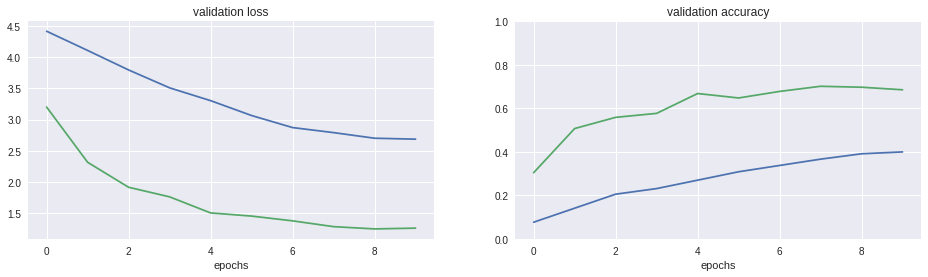

In [ ]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_acc"])
ax2.plot(history2.history["val_acc"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
loss, accuracy = model_new.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.1540323304004423
Test accuracy: 0.7156652360515021


In [ ]:
img, x = get_image('/content/PetImages/Cat/0.jpg')
probabilities = model_new.predict([x])


0.6425913
